Macro F1 trend CSV saved at ../results/metrics/macro_f1_trend_over_time.csv
               phase       date                       model  macro_f1
0   phase1_classical 2025-10-10           Classical_XGBoost  0.639300
1  phase2_distilBert 2025-10-23                  DistilBERT  0.683700
2   phase2_toxicBert 2025-11-10                   ToxicBERT  0.735945
3  phase3_llm_llama3 2025-11-15  meta-llama-3.1-8b-instruct  0.817883
4   phase3_llm_qwen3 2025-11-17      qwen3-4b-thinking-2507  0.951168
5    phase3_llm_phi4 2025-11-17        phi-4-reasoning-plus  0.942936


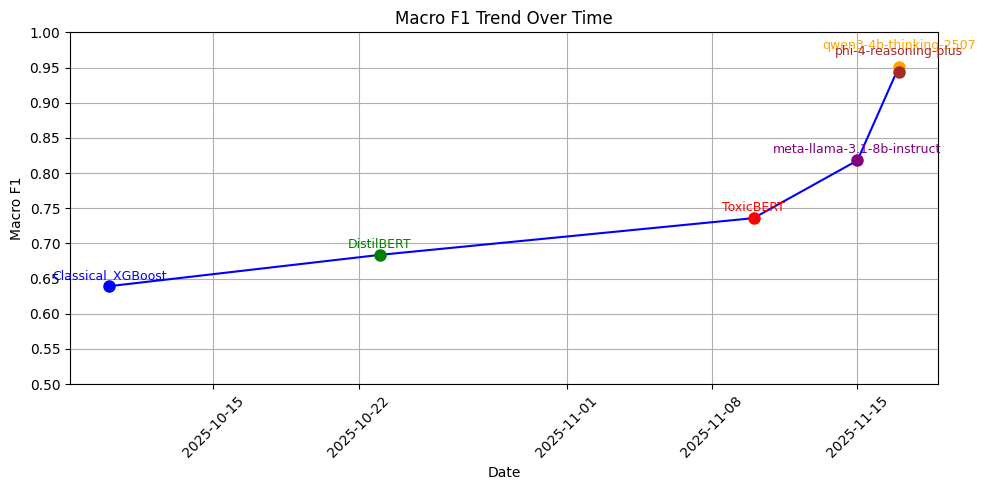

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd

phases = [
    {
        "phase": "phase1_classical",
        "date": "2025-10-10",
        "model": "Classical_XGBoost",
        "macro_f1": 0.6393
    },
    {
        "phase": "phase2_distilBert",
        "date": "2025-10-23",
        "model": "DistilBERT",
        "macro_f1": 0.6837
    },
    {
        "phase": "phase2_toxicBert",
        "date": "2025-11-10",
        "model": "ToxicBERT",
        "macro_f1": 0.7359447534294354
    },
    {
        "phase": "phase3_llm_llama3",
        "date": "2025-11-15",
        "model": "meta-llama-3.1-8b-instruct",
        "macro_f1": 0.8178831641946396
    },
    {
        "phase": "phase3_llm_qwen3",
        "date": "2025-11-17",
        "model": "qwen3-4b-thinking-2507",
        "macro_f1": 0.9511678981937602
    },
    {
        "phase": "phase3_llm_phi4",
        "date": "2025-11-17",
        "model": "phi-4-reasoning-plus",
        "macro_f1": 0.942936
    }
]

df_trend = pd.DataFrame(phases)
df_trend["date"] = pd.to_datetime(df_trend["date"])

trend_file = "../results/metrics/macro_f1_trend_over_time.csv"
df_trend.to_csv(trend_file, index=False)
print(f"Macro F1 trend CSV saved at {trend_file}")
print(df_trend)

plt.figure(figsize=(10,5))
plt.plot(df_trend["date"], df_trend["macro_f1"], marker="o", color="blue")

colors = {
    "Classical_XGBoost": "blue",
    "DistilBERT": "green",
    "ToxicBERT": "red",
    "meta-llama-3.1-8b-instruct": "purple",
    "qwen3-4b-thinking-2507": "orange",
    "phi-4-reasoning-plus": "brown"
}

for i, row in df_trend.iterrows():
    plt.plot(row["date"], row["macro_f1"], marker="o", color=colors[row["model"]], markersize=8)
    
    offset = 0.01
    if row["model"] in ["qwen3-4b-thinking-2507", "phi-4-reasoning-plus"]:
        offset += 0.015
    plt.text(row["date"], row["macro_f1"] + offset, row["model"], ha="center", fontsize=9, color=colors[row["model"]])


plt.title("Macro F1 Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Macro F1")
plt.ylim(0.5,1)
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.05))
plt.tight_layout()
plt.show()
